<a href="https://colab.research.google.com/github/ericcurtygiorno/Desafio_Tecnico_OnCase/blob/main/Receitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_json(r'/content/receitas.json')

In [ ]:
df.to_csv('receitas.csv')

In [ ]:
df = pd.read_csv('/content/receitas.csv')
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"['1. Place the stock, lentils, celery, carrot,...",7.0,2006-09-01 04:00:00+00:00,"['Sandwich', 'Bean', 'Fruit', 'Tomato', 'turke...",426.0,NaN,30.0,2.500,"Lentil, Apple, and Turkey Wrap",['4 cups low-sodium vegetable or chicken stock...,559.0
1,['Combine first 9 ingredients in heavy medium ...,23.0,2004-08-20 04:00:00+00:00,"['Food Processor', 'Onion', 'Pork', 'Bake', 'B...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"['1 1/2 cups whipping cream', '2 medium onions...",1439.0
2,['In a large heavy saucepan cook diced fennel ...,7.0,2004-08-20 04:00:00+00:00,"['Soup/Stew', 'Dairy', 'Potato', 'Vegetable', ...",165.0,NaN,6.0,3.750,Potato and Fennel Soup Hodge,"['1 fennel bulb (sometimes called anise), stal...",165.0
3,['Heat oil in heavy large skillet over medium-...,NaN,2009-03-27 04:00:00+00:00,"['Fish', 'Olive', 'Tomato', 'Sauté', 'Low Fat'...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"['2 tablespoons extra-virgin olive oil', '1 cu...",NaN
4,['Preheat oven to 350°F. Lightly grease 8x8x2-...,32.0,2004-08-20 04:00:00+00:00,"['Cheese', 'Dairy', 'Pasta', 'Vegetable', 'Sid...",547.0,NaN,20.0,3.125,Spinach Noodle Casserole,"['1 12-ounce package frozen spinach soufflé, t...",452.0


In [ ]:
df.shape

(20130, 11)

In [ ]:
df.duplicated().sum()

1834

In [ ]:
df.isnull().sum()

directions       19
fat            4222
date             19
categories       19
calories       4154
desc           6635
protein        4201
rating           30
title            19
ingredients      19
sodium         4156
dtype: int64

In [ ]:
df.dtypes

directions      object
fat            float64
date            object
categories      object
calories       float64
desc            object
protein        float64
rating         float64
title           object
ingredients     object
sodium         float64
dtype: object

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fat,15908.0,346.097498,20431.020991,0.0,7.00,17.000,33.000,1722763.0
calories,15976.0,6307.856848,358585.122970,0.0,198.00,331.000,586.000,30111218.0
protein,15929.0,99.946199,3835.616663,0.0,3.00,8.000,27.000,236489.0
rating,20100.0,3.713060,1.343144,0.0,3.75,4.375,4.375,5.0
sodium,15974.0,6211.473832,332890.254083,0.0,80.00,294.000,711.000,27675110.0


In [ ]:
# Removendo Duplicados
df = df.drop_duplicates()
df.shape

(18296, 11)

In [ ]:
# Tratando os Nulos
df = df.dropna(subset=['directions', 'fat', 'date', 'categories', 'calories', 'protein', 'title', 'ingredients', 'sodium'])

''' Tomei a liberdade de excluir a maioria das variáveis
Mantive somente com valores nulos a "desc" (descrição), pois acredito que a variável directions já funciona bem e o desc seria um comentário a mais caso necessário.
E também mantive o rating, pois são receitas que ainda não foram ranqueadas.

As outras variáveis eu removi os nulos pois não acredito que os valores nutricionais seriam bons sendo preenchidos com média e/ou mediana,
além de uma possível aplicação de um modelo de recomendação todos esses valores nulos atrapalhariam.
'''

df.shape

(14475, 11)

In [ ]:
# Transformando a variável Date para Date e deixando somente a data

# Transformando em data
df['date'] = pd.to_datetime(df['date'])

# Ajustando a variável (excluindo os demais caractéres que não sejam data)
df['date'] = df['date'].dt.strftime('%Y%m%d')

# Ajustando a data para o formato anterior
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [ ]:
df.dtypes

directions             object
fat                   float64
date           datetime64[ns]
categories             object
calories              float64
desc                   object
protein               float64
rating                float64
title                  object
ingredients            object
sodium                float64
dtype: object

In [ ]:
df_clean = df.copy()

In [ ]:
# Tratamento de outliers
Q1=df_clean['fat'].quantile(0.25)
Q3=df_clean['fat'].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print(upper_bound)

Q1 8.0
Q3 34.0
IQR 26.0
73.0


In [ ]:
Q1=df_clean['calories'].quantile(0.25)
Q3=df_clean['calories'].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print(upper_bound)

Q1 206.0
Q3 600.0
IQR 394.0
1191.0


In [ ]:
Q1=df_clean['protein'].quantile(0.25)
Q3=df_clean['protein'].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print(upper_bound)

Q1 3.0
Q3 28.0
IQR 25.0
65.5


In [ ]:
Q1=df_clean['sodium'].quantile(0.25)
Q3=df_clean['sodium'].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print(upper_bound)

Q1 90.0
Q3 734.0
IQR 644.0
1700.0


In [ ]:
df_clean.drop(df_clean[df_clean.fat > 73].index,axis =0, inplace = True)
df_clean.drop(df_clean[df_clean.calories > 1191].index,axis =0, inplace = True)
df_clean.drop(df_clean[df_clean.protein > 65.5].index,axis =0, inplace = True)
df_clean.drop(df_clean[df_clean.sodium > 1700].index,axis =0, inplace = True)

In [ ]:
df.shape

(14475, 11)

In [ ]:
df_clean.shape

(12440, 11)

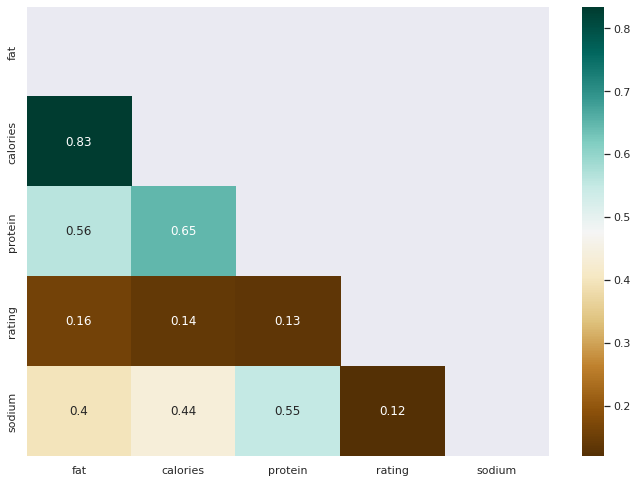

In [ ]:
mask = np.triu(np.ones_like(df_clean.corr(),dtype=bool))
sns.heatmap(df_clean.corr(), cmap='BrBG', mask=mask, square=False,annot=True);

In [ ]:
# "fat" e "calories" tem uma forte correlação positiva
# "fat" e "protein" tem uma média correlação positiva
# "calories" e "protein" tem uma boa correlação positiva
# "sodium" tem uma correlação positiva ok com "fat" e "calories" e média correlação com "protein"